<a href="https://colab.research.google.com/github/SaraAlsehli/Analysis-project/blob/patch-1/Instacart_Market_Basket_Analysis_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
aisles = pd.read_csv('/content/aisles.csv')
departments = pd.read_csv('/content/departments.csv')
order_products = pd.read_csv('/content/order_products__train.csv')
orders = pd.read_csv('/content/orders.csv')
products = pd.read_csv('/content/products.csv')




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display a few rows from each dataset
print(aisles.head())
print(departments.head())
print(order_products.head())
print(orders.head())
print(products.head())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_products = order_products['product_id'].value_counts().nlargest(10).index
filtered_order_products = order_products[order_products['product_id'].isin(top_products)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-f1027b49f698>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_id', data=filtered_order_products, palette='gist_earth',


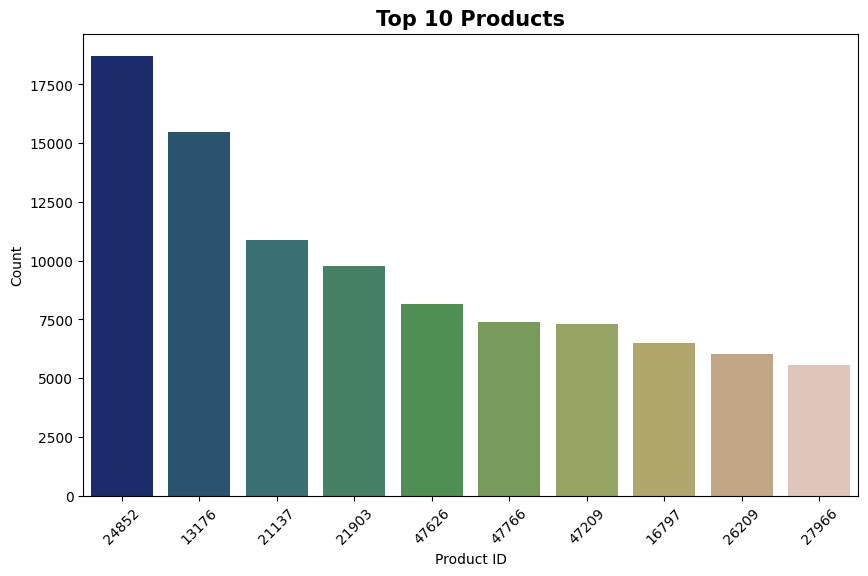

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='product_id', data=filtered_order_products, palette='gist_earth',
              order=filtered_order_products['product_id'].value_counts().index)
plt.title("Top 10 Products", fontsize=15, weight='bold')
plt.xticks(rotation=45)
plt.xlabel("Product ID")
plt.ylabel("Count")
plt.show()

# Merge order_products with products and orders to get complete information


In [ ]:
order_products_merged = order_products.merge(products, on='product_id', how='left')
order_products_merged = order_products_merged.merge(orders, on='order_id', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Filter top products and orders to reduce data size


In [ ]:
top_products = order_products['product_id'].value_counts().index[:30000]
top_orders = orders['order_id'].value_counts().index[:30000]

filtered_data = order_products_merged[
    order_products_merged['product_id'].isin(top_products) &
    order_products_merged['order_id'].isin(top_orders)
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Create a basket representation where each row is a list of products in an order


In [ ]:
basket = filtered_data[['order_id', 'product_name']].drop_duplicates()
basket = basket.groupby('order_id')['product_name'].apply(list).reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Remove any NaN values from the product_name list


In [ ]:
basket['product_name'] = basket['product_name'].apply(lambda x: [item for item in x if isinstance(item, str)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Use TransactionEncoder to transform the basket data into the required format for Apriori


In [ ]:
te = TransactionEncoder()
basket_transformed = te.fit(basket['product_name']).transform(basket['product_name'])
basket_df = pd.DataFrame(basket_transformed, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Generate frequent itemsets using the Apriori algorithm

In [ ]:
frequent_itemsets = apriori(basket_df, min_support=0.005, use_colnames=True)
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.008446,(100% Lactose Free Fat Free Milk)
1,0.006757,(100% Raw Coconut Water)
2,0.005068,(100% Recycled Paper Towels)
3,0.013514,(100% Whole Wheat Bread)
4,0.006757,(2% Reduced Fat DHA Omega-3 Reduced Fat Milk)


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Banana),(85% Lean Ground Beef),0.134291,0.010135,0.005068,0.037736,3.723270,0.003707,1.028683,0.844878
1,(85% Lean Ground Beef),(Banana),0.010135,0.134291,0.005068,0.500000,3.723270,0.003707,1.731419,0.738908
2,(Apple Honeycrisp Organic),(Bag of Organic Bananas),0.023649,0.113176,0.006757,0.285714,2.524520,0.004080,1.241554,0.618512
3,(Bag of Organic Bananas),(Apple Honeycrisp Organic),0.113176,0.023649,0.006757,0.059701,2.524520,0.004080,1.038342,0.680952
4,(Apple Honeycrisp Organic),(Organic Baby Spinach),0.023649,0.069257,0.005068,0.214286,3.094077,0.003430,1.184582,0.693195


In [ ]:
filtered_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.2)]
print(filtered_rules.head())

                                      antecedents               consequents  \
97                           (Honey Nut Cheerios)                  (Banana)   
401                     (Uncured Slow Cooked Ham)    (Organic Strawberries)   
409  (Organic Hass Avocado, Organic Baby Spinach)  (Bag of Organic Bananas)   
415   (Organic Raspberries, Organic Baby Spinach)  (Bag of Organic Bananas)   
427   (Organic Raspberries, Organic Hass Avocado)  (Bag of Organic Bananas)   

     antecedent support  consequent support   support  confidence      lift  \
97             0.009291            0.134291  0.005068    0.545455  4.061750   
401            0.005912            0.092905  0.005068    0.857143  9.225974   
409            0.010980            0.113176  0.005912    0.538462  4.757750   
415            0.008446            0.113176  0.005068    0.600000  5.301493   
427            0.008446            0.113176  0.005912    0.700000  6.185075   

     leverage  conviction  zhangs_metric  
97   0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#This scatter plot shows the relationship between 'support' and 'confidence' for each rule.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


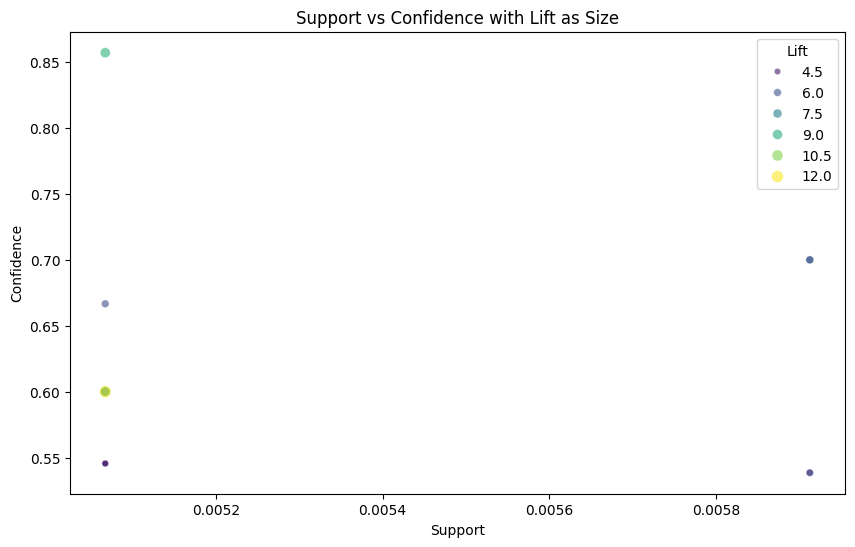

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_rules, x='support', y='confidence', size='lift', hue='lift', alpha=0.6, palette='viridis')
plt.title('Support vs Confidence with Lift as Size')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='upper right', title='Lift')
plt.show()

# This histogram shows the distribution of confidence values for all the rules.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


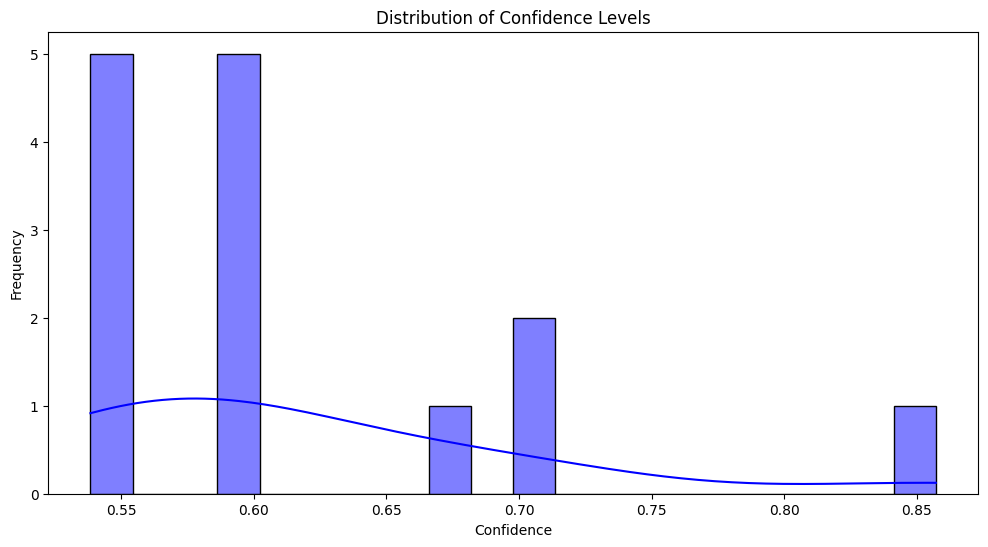

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(filtered_rules['confidence'], bins=20, kde=True, color='blue')
plt.title('Distribution of Confidence Levels')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

# This histogram shows the distribution of lift values for all the rules.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


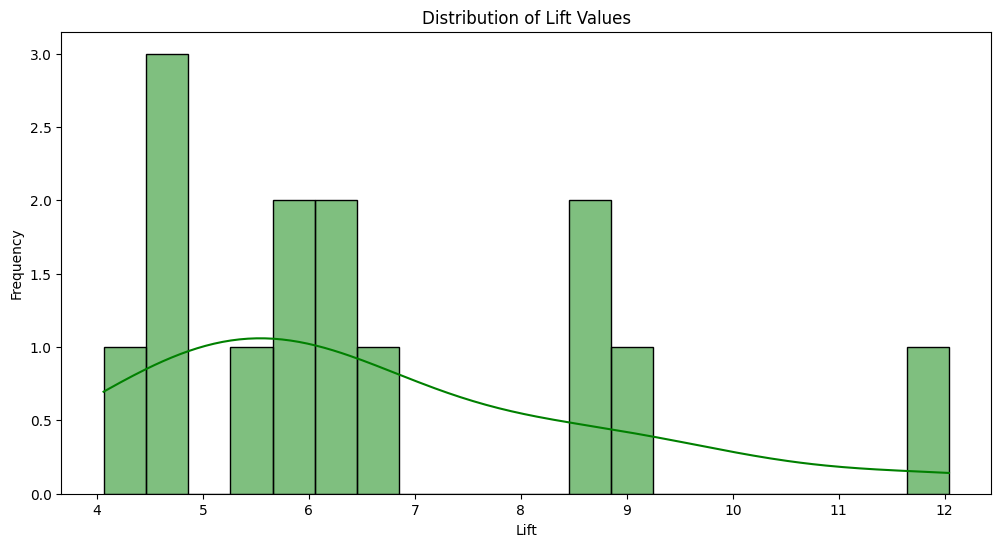

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(filtered_rules['lift'], bins=20, kde=True, color='green')
plt.title('Distribution of Lift Values')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()


# Support vs Lift with Confidence as Size
This scatter plot shows the relationship between 'support' and 'lift' for each rule.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


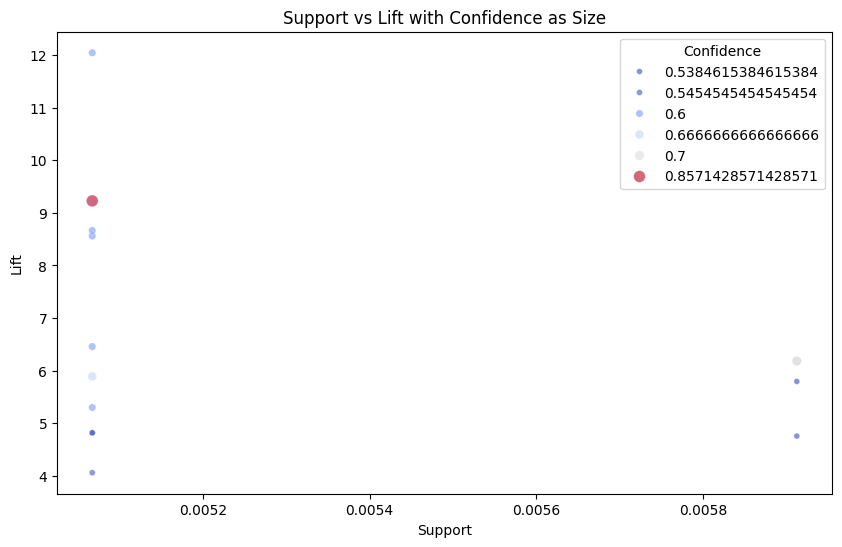

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_rules, x='support', y='lift', size='confidence', hue='confidence', alpha=0.6, palette='coolwarm')
plt.title('Support vs Lift with Confidence as Size')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.legend(loc='upper right', title='Confidence')
plt.show()